In [8]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
from matplotlib import pyplot as plt
from sklearn import manifold,datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs

In [9]:
# generate random data
x,y=make_blobs(50,centers=[[4,4], [-2, -1], [1, 1], [10,4]],cluster_std=0.9)

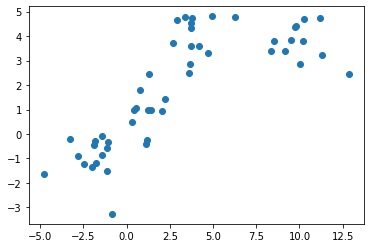

In [10]:
plt.scatter(x[:,0],x[:,1],marker='o')

In [11]:
# create agglomerative clustering model
aglom=AgglomerativeClustering(4,linkage='average')
# fit the model
aglom.fit(x,y)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='average', memory=None, n_clusters=4)

**DATA VISUALIZATION**

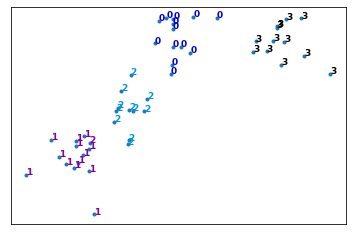

In [12]:
# figure size
plt.figure(figsize=(6,4))
# These two lines of code are used to scale the data points down, Or else the data points will be scattered very far apart.
xmin,xmax=np.min(x,axis=0),np.max(x,axis=0)
x=(x-xmin)/(xmax-xmin)
# to display data points
for i in range(x.shape[0]):
  # Replace the data points with their respective cluster value along with color
  plt.text(x[i,0],x[i,1],str(y[i]),color=plt.cm.nipy_spectral(aglom.labels_[i]/10),fontdict={'weight':'bold','size':9})
plt.xticks([])
plt.yticks([])
plt.scatter(x[:,0],x[:,1],marker='.')
plt.show()

**Dendrogram Associated for Agglomerative Hierarchical Clustering**

In [13]:
# distance matrix
dist_matrix=distance_matrix(x,x)
dist_matrix

array([[0.        , 0.46147306, 0.48781183, ..., 0.61333153, 0.36020281,
        0.66162335],
       [0.46147306, 0.        , 0.0483448 , ..., 0.38771429, 0.137586  ,
        0.38763252],
       [0.48781183, 0.0483448 , 0.        , ..., 0.34598164, 0.14104791,
        0.34213169],
       ...,
       [0.61333153, 0.38771429, 0.34598164, ..., 0.        , 0.33014869,
        0.06729692],
       [0.36020281, 0.137586  , 0.14104791, ..., 0.33014869, 0.        ,
        0.35366367],
       [0.66162335, 0.38763252, 0.34213169, ..., 0.06729692, 0.35366367,
        0.        ]])

In [14]:
# using complete linkage 
z=hierarchy.linkage(dist_matrix,'complete')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


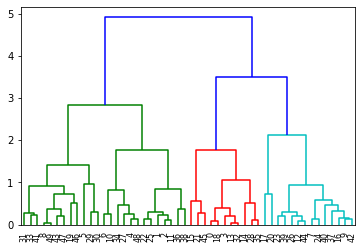

In [15]:
# hierarchical clustering is represented by dendrogram
dendro=hierarchy.dendrogram(z)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


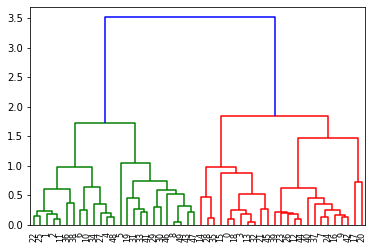

In [16]:
# using average linkage
z=hierarchy.linkage(dist_matrix,'average')
dendro1=hierarchy.dendrogram(z)